### Introduction to Economic Growth and Productive Employment

#### Gross Domestic Product (GDP) as a Measure of Economic Growth

Gross Domestic Product (GDP) represents the total value of goods and services produced within a nation's economy, minus the value of inputs consumed during production. In this study, two key measures of GDP will be examined:

1. **Contribution by GDP** – the sector-wise share of the economy’s total output.
2. **Growth by GDP** – the rate at which a nation’s GDP increases over time, reflecting economic expansion.

#### Productive Employment

Productive employment refers to jobs that provide sufficient income, enabling workers and their dependents to maintain a standard of living above the poverty line. According to the International Labour Organization (ILO), the international poverty threshold is set at approximately USD 2 (USD 1.90) per day. Individuals earning below this amount are considered to be part of the "working poor."

In the context of this study, the working poor are defined as those earning less than **KSh 10,000** per month, a group falling within the wage bracket of **0 to 9,999**.


### Workflow of Project

This project utilizes the Data Science Project Life Cycle, which has the following steps:

1. Data Collection
2. Data Preparation
3. Exploratory Data Analysis
4. Modelling
5. Model Evaluation
6. Model Deployment

### 1. Data Collection
- Yearly Data for the columns:  Year, Sector(Industry), Contribuiton to GDP, Growth By GDP, number of people in wage brackects as per industry (0 - 9,999; 10,000 - 14,999; 15,000 - 19,999; 20,000 - 24,999; 25,000 - 29,999; 30,000 - 49,999; 50,000 - 99,999; >100,000), total employment per industry;  is collected from the " Kenya National Bureau of Statistics " annual reports.
- The yearly data is collected form year 2011 to 2022.

### 2. Data Preparation
- Joining yearly datasets to a single dataset spanning all the years (2011 - 2022 )
- Performing basic data pre-processing
- Filling all the NAN values with mean of the column

In [33]:
import pandas as pd
#Reading dataset
df = pd.read_excel('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled.xlsx')
df.head()

,Year,Sector,Contribution to GDP,Growth By GDP,"0 - 9,999","10,000 - 14999","15,000 - 19999","20,000 - 24999","25,000 - 29999","30,000 - 49999","50,000 - 99999",100000,TOTAL
0,2011,"Agriculture, Forestry and Fishing",18.9,2.4,12141.000000,36238.000000,111549.0,100240,37712,23976,12935,6631.0,341422
1,2011,Mining And Quarrying Industry,1.1,13.1,59.000000,101.000000,944.0,1586,1965,2312,1752,13.0,8732
2,2011,Manufacturing,12.0,7.7,632.000000,1723.000000,17205.0,50949,54427,76329,70040,5580.0,276885
3,2011,"Electricity, Gas, Steam And Air Conditioning S...",1.6,8.9,1593.650685,101.000000,45.0,3229,690,1413,6830,30.0,12338
4,2011,"Water Supply; Sewerage, Waste Management And R...",0.9,3.6,1593.650685,2582.578704,8844.5,3036,1983,1970,818,83.0,7890


In [34]:
# Renaming columns
df.columns = ['Year', 'Industry', 'Contribution_to_GDP', 'Growth_of_GDP',
       'Working_Poor', 'Wage_bracket_10000_to_14999',
       'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999',
       'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999',
       'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus', 'TOTAL']

In [35]:
len(df.Industry.unique())

20

There are 20 unique columns in the compiled dataset as shown by the result above, which is as expected

In [36]:
# Removing special characters from Wage_bracket columns
cols = ['Working_Poor', 'Wage_bracket_10000_to_14999',
       'Wage_bracket_15000_to_19999', 'Wage_bracket_20000_to_24999',
       'Wage_bracket_25000_to_29999', 'Wage_bracket_30000_to_49999',
       'Wage_bracket_50000_to_99999', 'Wage_bracket_100000_plus', 'TOTAL']

df[cols] = df[cols].astype(str)  # cast to string

# Removing special characters
df[cols] = df[cols].replace({'\$': '', ',': '', '-': ''}, regex=True)

# path to dataset
df.to_csv('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled_updated.xlsx',index=False)

### 3. Exploratory Data Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [38]:

df = pd.read_csv('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled_updated.xlsx', parse_dates=['Year'],
                 index_col=['Year'],)
df


,Industry,Contribution_to_GDP,Growth_of_GDP,Working_Poor,Wage_bracket_10000_to_14999,Wage_bracket_15000_to_19999,Wage_bracket_20000_to_24999,Wage_bracket_25000_to_29999,Wage_bracket_30000_to_49999,Wage_bracket_50000_to_99999,Wage_bracket_100000_plus,TOTAL
Year,,,,,,,,,,,,
2011-01-01,"Agriculture, Forestry and Fishing",18.9,2.4,12141.000000,36238.000000,111549.0,100240,37712,23976,12935,6631.000000,341422
2011-01-01,Mining And Quarrying Industry,1.1,13.1,59.000000,101.000000,944.0,1586,1965,2312,1752,13.000000,8732
2011-01-01,Manufacturing,12.0,7.7,632.000000,1723.000000,17205.0,50949,54427,76329,70040,5580.000000,276885
2011-01-01,"Electricity, Gas, Steam And Air Conditioning S...",1.6,8.9,1593.650685,101.000000,45.0,3229,690,1413,6830,30.000000,12338
2011-01-01,"Water Supply; Sewerage, Waste Management And R...",0.9,3.6,1593.650685,2582.578704,8844.5,3036,1983,1970,818,83.000000,7890
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,Human Health and Social Work Activities,1.8,4.5,94.000000,777.000000,3455.0,6531,8271,43750,62177,38322.000000,163377
2022-01-01,Public Administration And Defence; Compulsory ...,5.0,4.5,1690.000000,1452.000000,5406.0,7320,9906,83091,201917,24112.000000,334894
2022-01-01,Other Service Activities,1.2,5.8,1593.650685,431.000000,446.0,1016,1067,13400,20552,3217.000000,40129


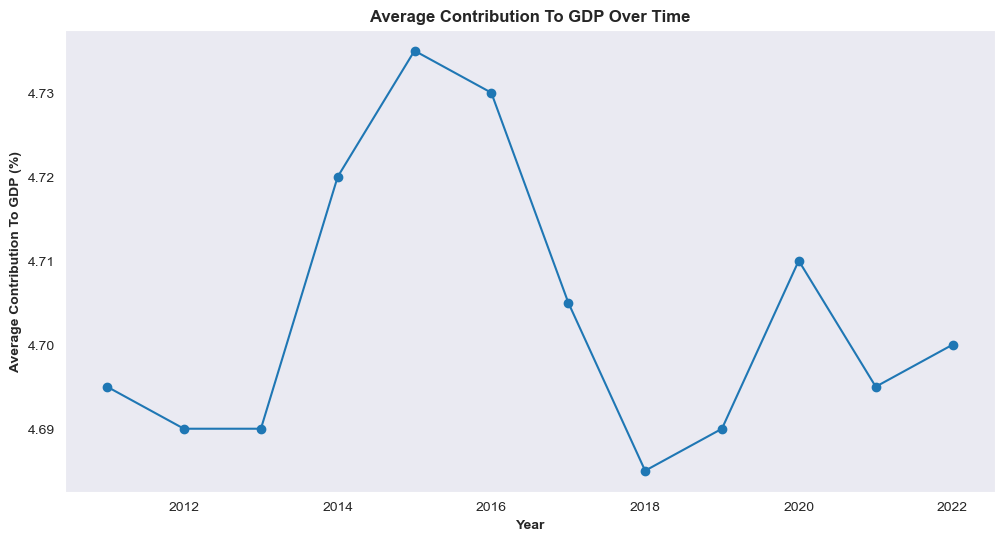

In [39]:
# Contribution to GDP over time
gdp_year = df.groupby(df.index)['Contribution_to_GDP'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(gdp_year['Year'], gdp_year['Contribution_to_GDP'], marker='o')
plt.title('Average Contribution To GDP Over Time', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Average Contribution To GDP (%)',fontweight='bold')
plt.grid(False)
plt.show()



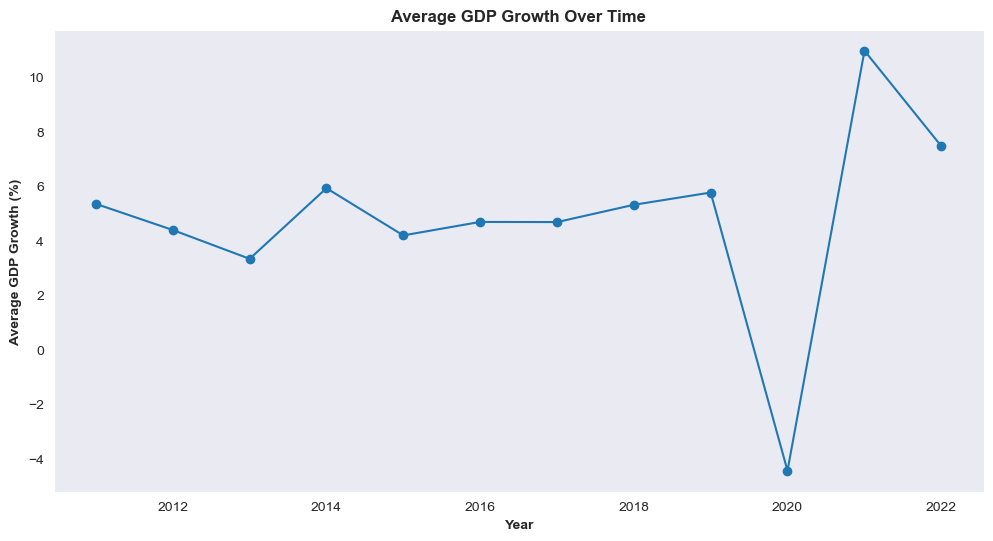

In [40]:

# GDP Growth over time
gdp_growth_year = df.groupby(df.index)['Growth_of_GDP'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(gdp_growth_year['Year'], gdp_growth_year['Growth_of_GDP'], marker='o')
plt.title('Average GDP Growth Over Time', fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Average GDP Growth (%)', fontweight='bold')
plt.grid(False)
plt.show()


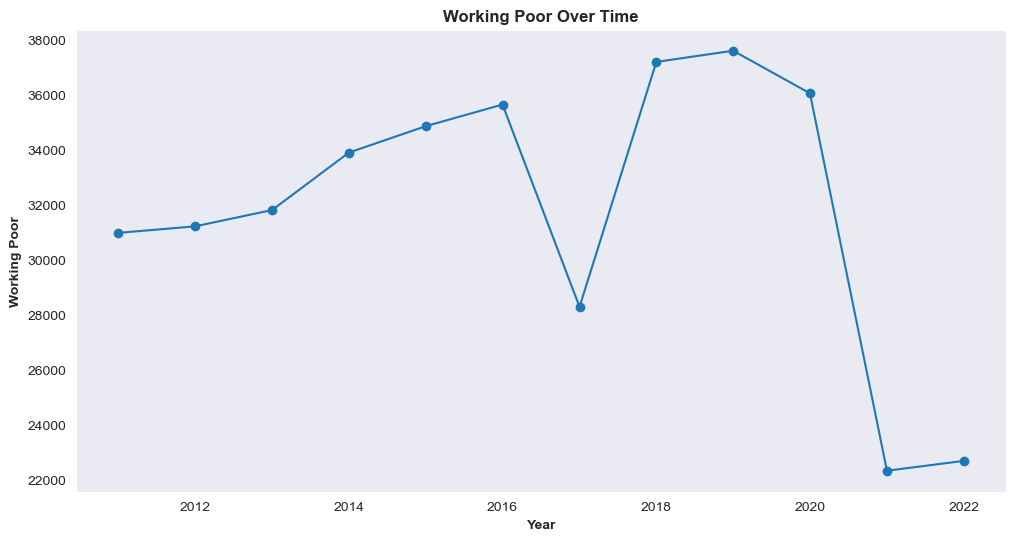

In [41]:

# Working Poor and Total Employment
# Filter relevant columns
plot_data = df[['Working_Poor', 'TOTAL']]
# Group by Year and sum the values
plot_data_grouped = plot_data.groupby(plot_data.index).sum()

# Plotting Working Poor
plt.figure(figsize=(12, 6))
plt.plot(plot_data_grouped.index, plot_data_grouped['Working_Poor'], marker='o')
plt.title('Working Poor Over Time', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Working Poor', fontweight='bold')
plt.grid(False)
plt.show()


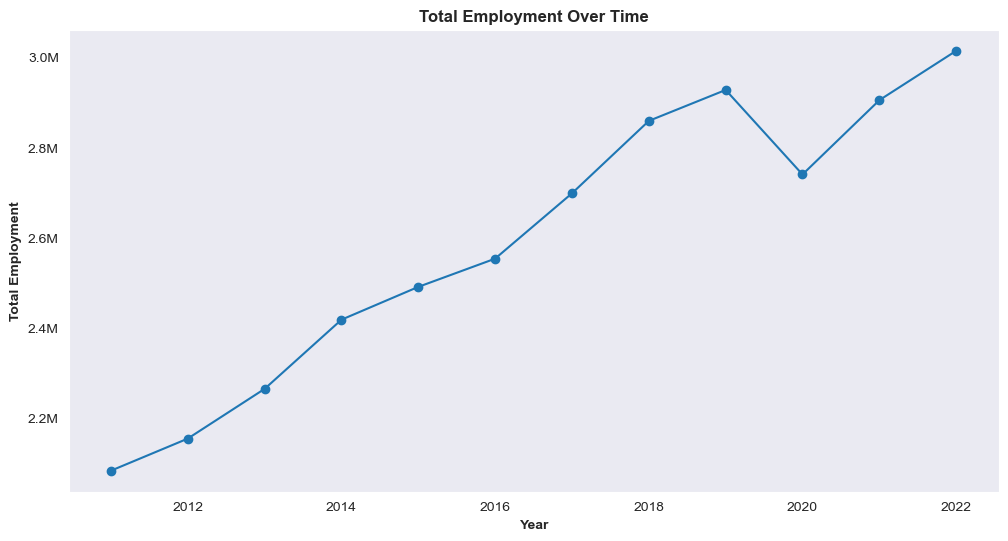

In [42]:

# Plotting Total Employment with formatted y-axis
def format_millions(value, _):
    return f'{value / 1e6:.1f}M'

plt.figure(figsize=(12, 6))
plt.plot(plot_data_grouped.index, plot_data_grouped['TOTAL'], marker='o')
plt.title('Total Employment Over Time', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Employment', fontweight='bold')
plt.grid(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))  # Apply the formatting
plt.show()



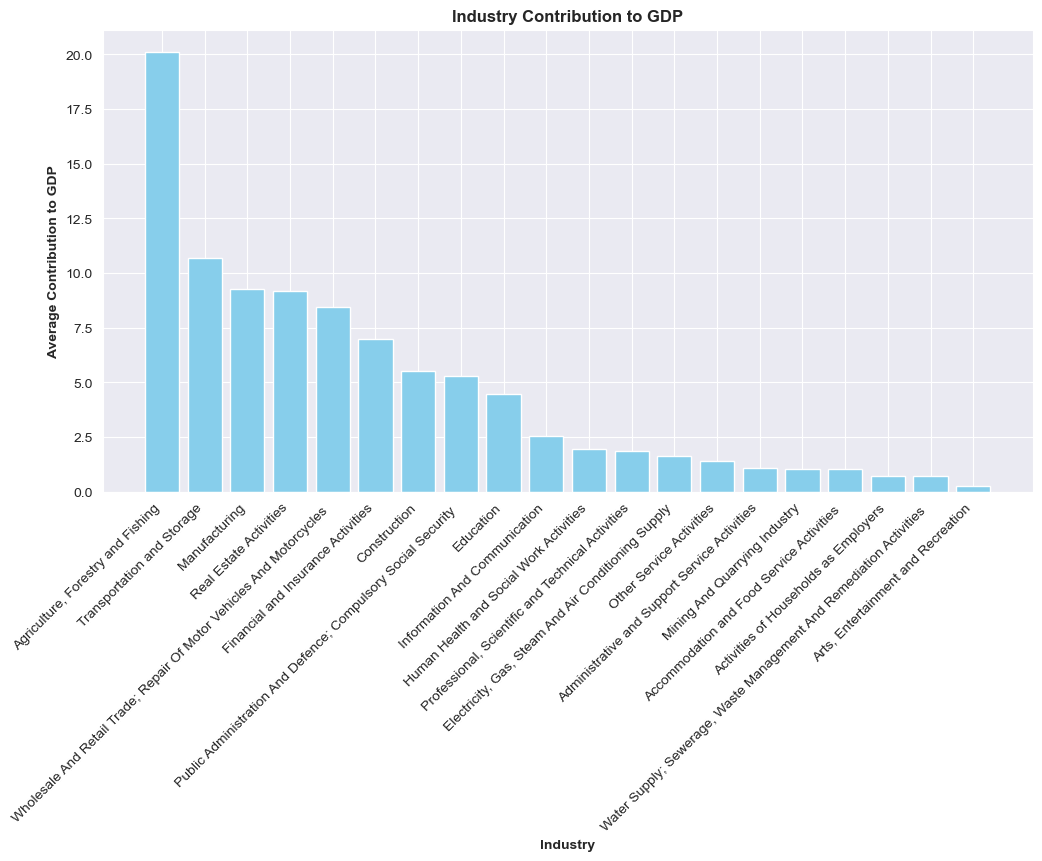

In [43]:

industry_gdp = df.groupby('Industry')['Contribution_to_GDP'].mean().reset_index().sort_values('Contribution_to_GDP',ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(industry_gdp['Industry'], industry_gdp['Contribution_to_GDP'], color='skyblue')
plt.title('Industry Contribution to GDP', fontweight='bold')
plt.xlabel('Industry', fontweight='bold')
plt.ylabel('Average Contribution to GDP', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()


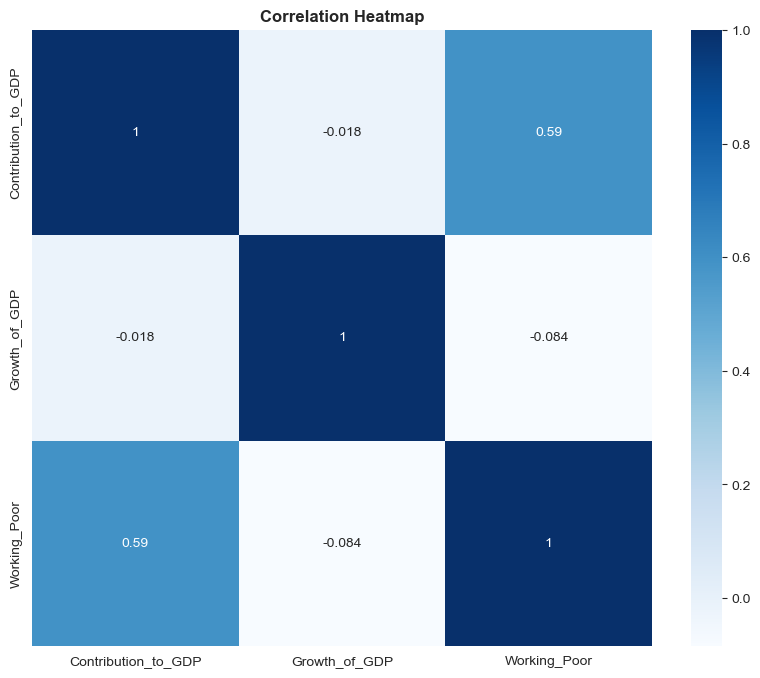

In [44]:

plt.figure(figsize=(10, 8))
sns.heatmap(df[['Contribution_to_GDP', 'Growth_of_GDP',
                'Working_Poor']].corr(), cmap='Blues',annot=True)
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()


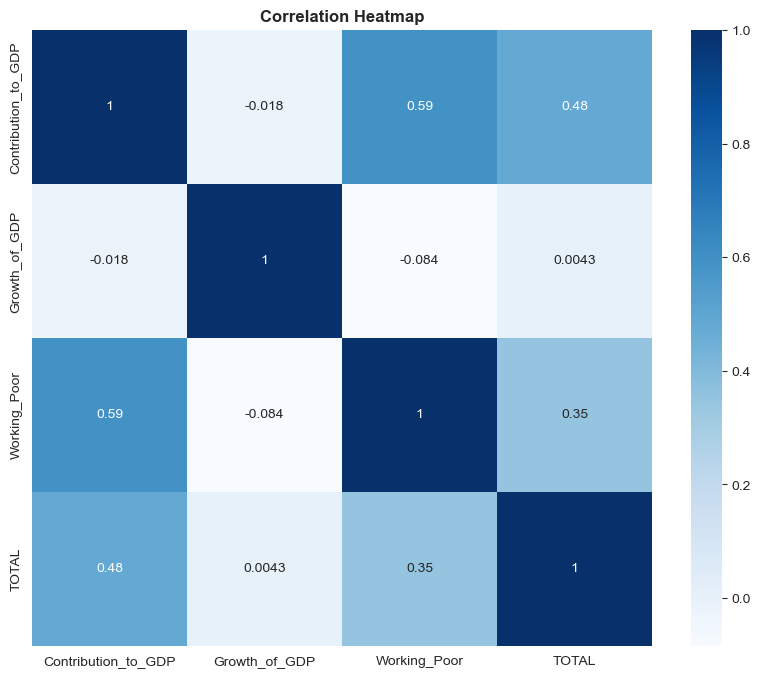

In [45]:

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Contribution_to_GDP', 'Growth_of_GDP', 'Working_Poor', 'TOTAL']].corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

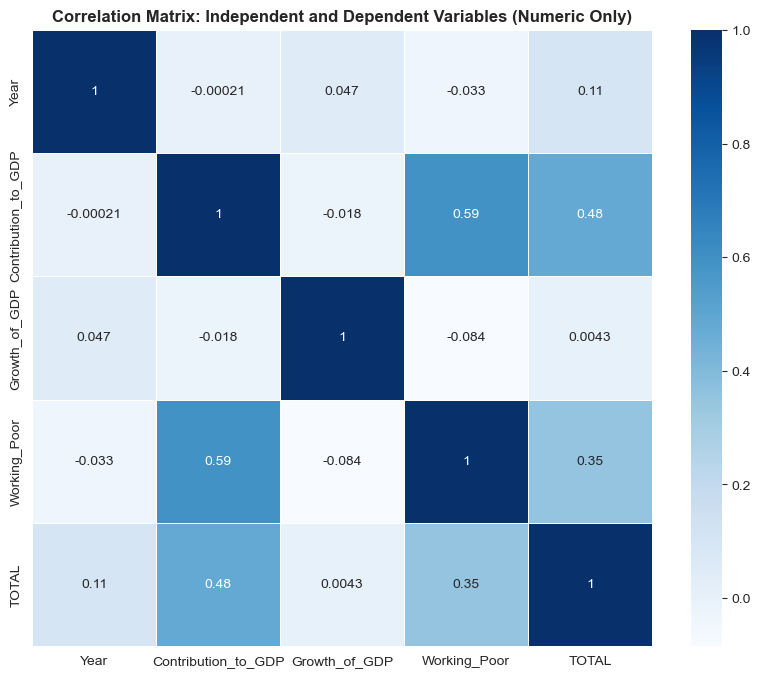

In [46]:

# Reset index if 'Year' is part of the index
df = df.reset_index()

# Check if 'index' is present and rename it to 'Year'
if 'index' in df.columns:
    df.rename(columns={'index': 'Year'}, inplace=True)

# Correlation between the independent and dependent variables, excluding the non-numeric 'Industry' column
selected_columns = ['Year', 'Contribution_to_GDP', 'Growth_of_GDP', 'Working_Poor', 'TOTAL']
df_selected = df[selected_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix: Independent and Dependent Variables (Numeric Only)', fontweight='bold')
plt.show()

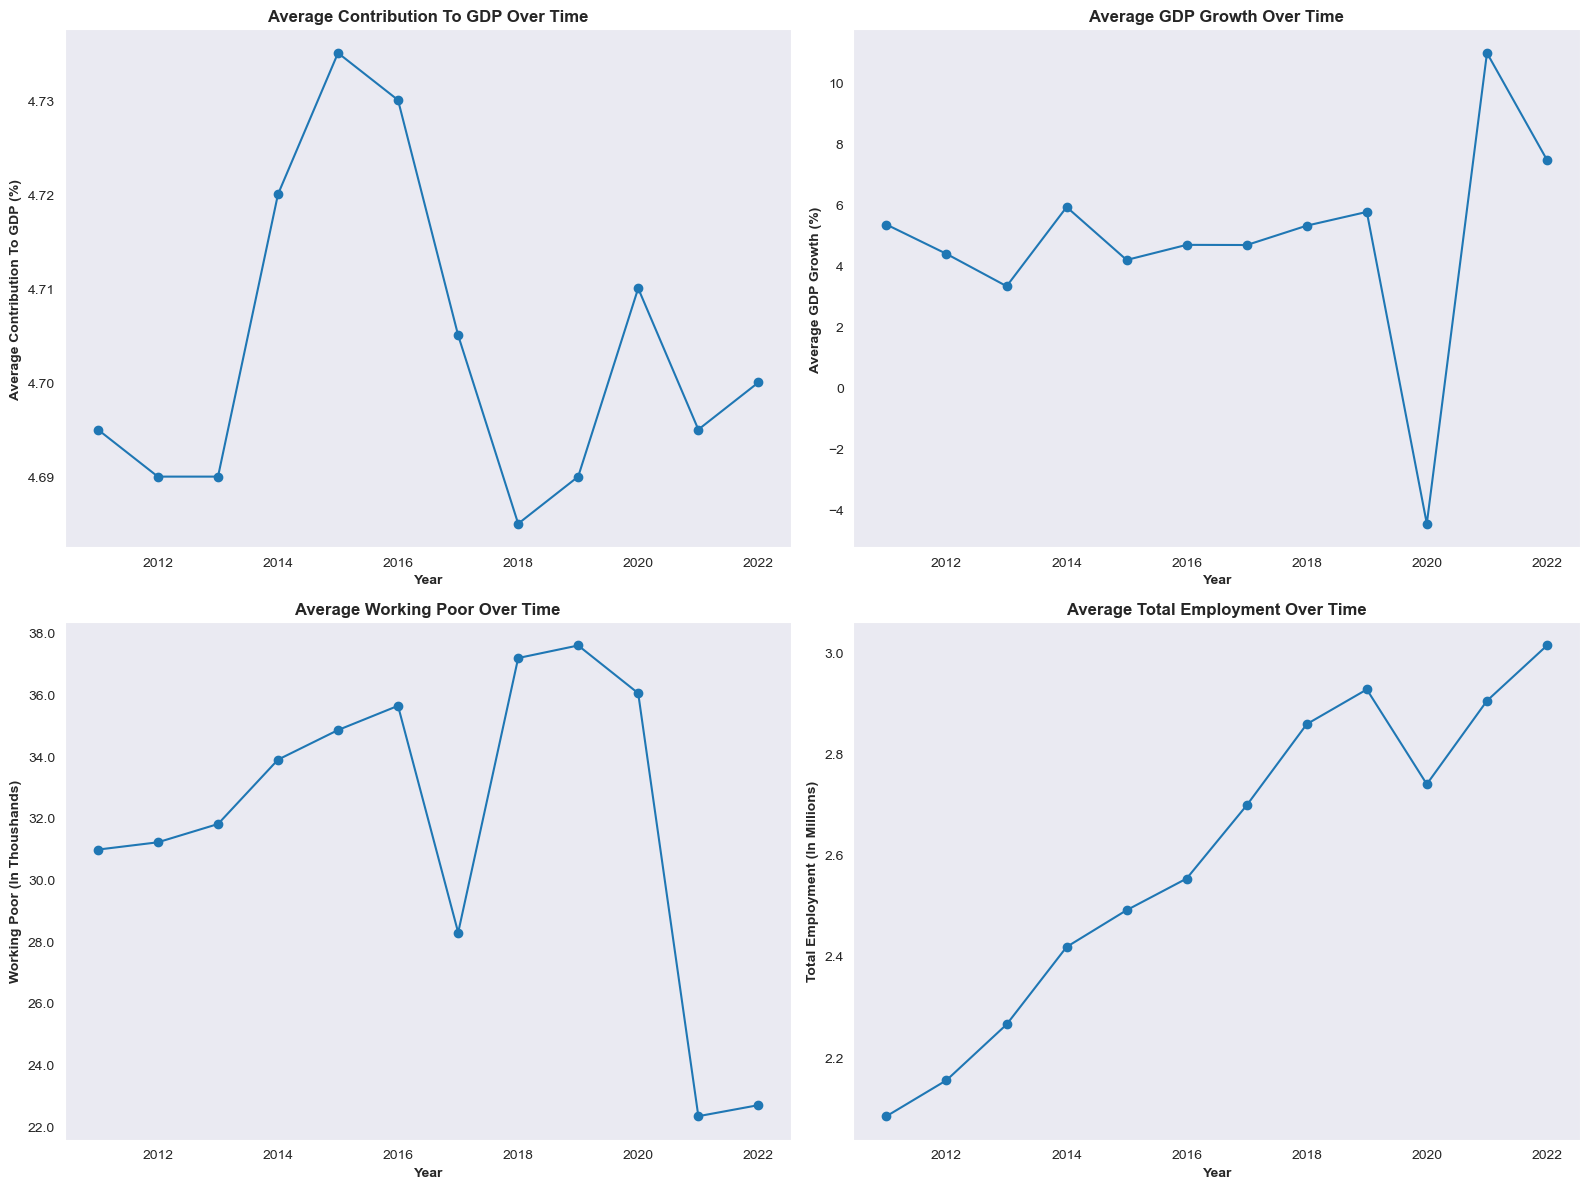

In [47]:
# Load and preprocess data
df = pd.read_csv('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled_updated.xlsx', parse_dates=['Year'], index_col=['Year'])

# Calculate averages for Contribution_to_GDP and Growth_of_GDP
gdp_year = df.groupby(df.index)['Contribution_to_GDP'].mean().reset_index()
gdp_growth_year = df.groupby(df.index)['Growth_of_GDP'].mean().reset_index()

# Filter relevant columns for Working Poor and Total Employment
plot_data = df[['Working_Poor', 'TOTAL']]
plot_data_grouped = plot_data.groupby(plot_data.index).sum()

# Function to format y-axis ticks in thousands
def format_thousands(value, _):
    return f'{value / 1e3:.1f}'

# Plotting Total Employment with formatted y-axis
def format_millions(value, _):
    return f'{value / 1e6:.1f}'


# Create a 2x2 grid for the line charts
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Average Contribution Over Time
axs[0, 0].plot(gdp_year.Year, gdp_year['Contribution_to_GDP'], marker='o')
axs[0, 0].set_title('Average Contribution To GDP Over Time', fontweight='bold')
axs[0, 0].set_xlabel('Year', fontweight='bold')
axs[0, 0].set_ylabel('Average Contribution To GDP (%)', fontweight='bold')
axs[0, 0].grid(False)

# Plot 2: Average GDP Growth Over Time
axs[0, 1].plot(gdp_growth_year.Year, gdp_growth_year['Growth_of_GDP'], marker='o')
axs[0, 1].set_title('Average GDP Growth Over Time', fontweight='bold')
axs[0, 1].set_xlabel('Year', fontweight='bold')
axs[0, 1].set_ylabel('Average GDP Growth (%)', fontweight='bold')
axs[0, 1].grid(False)

# Plot 3: Working Poor Over Time with y-axis formatted in thousands
axs[1, 0].plot(plot_data_grouped.index, plot_data_grouped['Working_Poor'], marker='o')
axs[1, 0].set_title('Average Working Poor Over Time', fontweight='bold')
axs[1, 0].set_xlabel('Year', fontweight='bold')
axs[1, 0].set_ylabel('Working Poor (In Thoushands)', fontweight='bold')
axs[1, 0].grid(False)
axs[1, 0].yaxis.set_major_formatter(FuncFormatter(format_thousands))  # Apply the formatting

# Plot 4: Total Employment Over Time with formatted y-axis in millions
axs[1, 1].plot(plot_data_grouped.index, plot_data_grouped['TOTAL'], marker='o')
axs[1, 1].set_title('Average Total Employment Over Time', fontweight='bold')
axs[1, 1].set_xlabel('Year', fontweight='bold')
axs[1, 1].set_ylabel('Total Employment (In Millions)', fontweight='bold')
axs[1, 1].grid(False)
axs[1, 1].yaxis.set_major_formatter(FuncFormatter(format_millions))  # Apply the formatting

# Adjust layout
plt.tight_layout()

# Show the grid of line charts
plt.show()


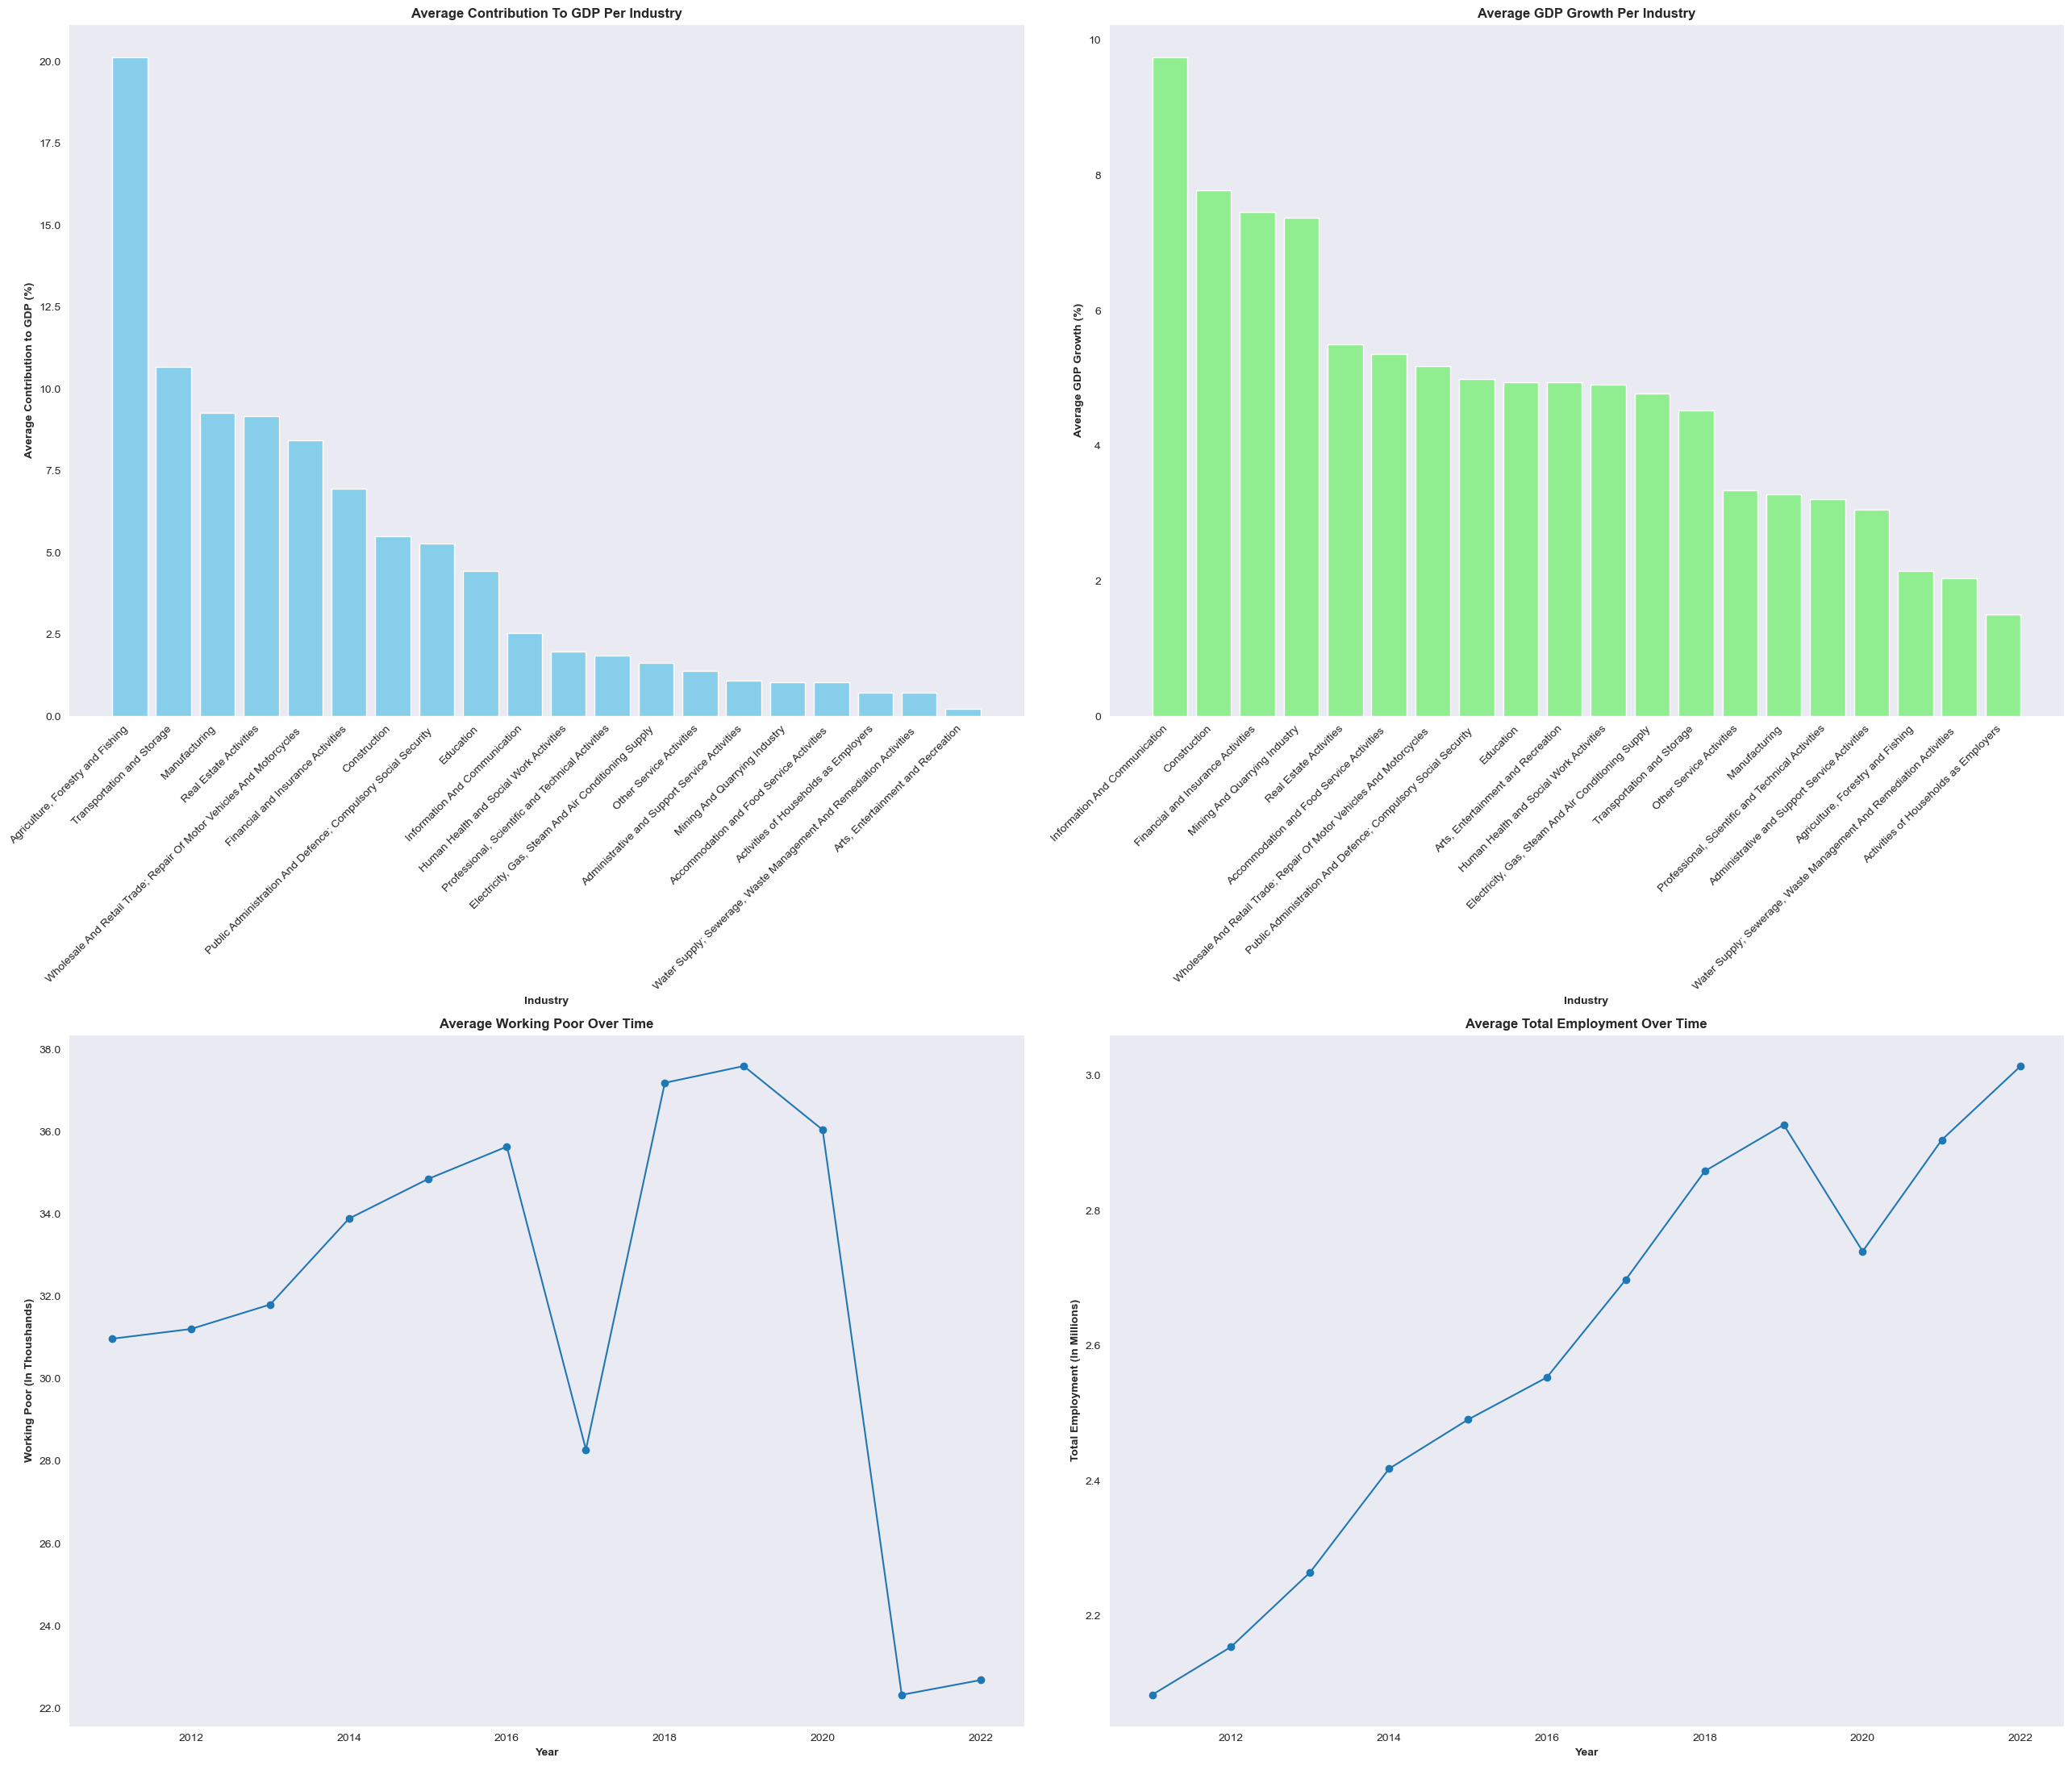

In [48]:
# Load and preprocess data
df = pd.read_csv('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled_updated.xlsx', parse_dates=['Year'], index_col=['Year'])

# Group by industry for Contribution_to_GDP and Growth_of_GDP
industry_gdp = df.groupby('Industry')['Contribution_to_GDP'].mean().reset_index().sort_values('Contribution_to_GDP', ascending=False)
industry_gdp_growth = df.groupby('Industry')['Growth_of_GDP'].mean().reset_index().sort_values('Growth_of_GDP', ascending=False)

# Filter relevant columns for Working Poor and Total Employment
plot_data = df[['Working_Poor', 'TOTAL']]
plot_data_grouped = plot_data.groupby(plot_data.index).sum()

# Function to format y-axis ticks in thousands
def format_thousands(value, _):
    return f'{value / 1e3:.1f}'

# Function to format y-axis ticks with one decimal place for millions
def format_millions(value, _):
    return f'{value / 1e6:.1f}'

# Create a 2x2 grid for the line charts and industry-wise charts
fig, axs = plt.subplots(2, 2, figsize=(26, 22))# Change figSize to change the size of the plot..... increase it to make it bigger

# Plot 1: Industry-wise Average Contribution to GDP
axs[0, 0].bar(industry_gdp['Industry'], industry_gdp['Contribution_to_GDP'], color='skyblue')
axs[0, 0].set_title('Average Contribution To GDP Per Industry', fontweight='bold')
axs[0, 0].set_xlabel('Industry', fontweight='bold')
axs[0, 0].set_ylabel('Average Contribution to GDP (%)', fontweight='bold')
axs[0, 0].set_xticks(range(len(industry_gdp['Industry'])))  # Set positions
axs[0, 0].set_xticklabels(industry_gdp['Industry'], rotation=45, ha='right')
axs[0, 0].grid(False)

# Plot 2: Industry-wise Average GDP Growth
axs[0, 1].bar(industry_gdp_growth['Industry'], industry_gdp_growth['Growth_of_GDP'], color='lightgreen')
axs[0, 1].set_title('Average GDP Growth Per Industry', fontweight='bold')
axs[0, 1].set_xlabel('Industry', fontweight='bold')
axs[0, 1].set_ylabel('Average GDP Growth (%)', fontweight='bold')
axs[0, 1].set_xticks(range(len(industry_gdp_growth['Industry'])))  # Set positions
axs[0, 1].set_xticklabels(industry_gdp_growth['Industry'], rotation=45, ha='right')
axs[0, 1].grid(False)

# Plot 3: Working Poor Over Time with y-axis formatted in thousands
axs[1, 0].plot(plot_data_grouped.index, plot_data_grouped['Working_Poor'], marker='o')
axs[1, 0].set_title('Average Working Poor Over Time', fontweight='bold')
axs[1, 0].set_xlabel('Year', fontweight='bold')
axs[1, 0].set_ylabel('Working Poor (In Thoushands)',fontweight='bold')
axs[1, 0].grid(False)
axs[1, 0].yaxis.set_major_formatter(FuncFormatter(format_thousands))  # Apply the formatting

# Plot 4: Total Employment Over Time with formatted y-axis in millions
axs[1, 1].plot(plot_data_grouped.index, plot_data_grouped['TOTAL'], marker='o')
axs[1, 1].set_title('Average Total Employment Over Time', fontweight='bold')
axs[1, 1].set_xlabel('Year', fontweight='bold')
axs[1, 1].set_ylabel('Total Employment (In Millions)', fontweight='bold')
axs[1, 1].grid(False)
axs[1, 1].yaxis.set_major_formatter(FuncFormatter(format_millions))  # Apply the formatting

# Adjust layout
plt.tight_layout()

# Show the grid of charts
plt.show()




### 4. Modelling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.layers import Bidirectional
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

### a. Predictive Analysis of the Working Poor

In [50]:
# Load and preprocess data
df = pd.read_csv('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled_updated.xlsx', parse_dates=['Year'], index_col=['Year'])
cols = ['Working_Poor', 'Contribution_to_GDP', 'Growth_of_GDP', 'Industry',
        'Wage_bracket_10000_to_14999', 'Wage_bracket_15000_to_19999',
        'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999',
        'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999',
        'Wage_bracket_100000_plus', 'Total_number_in_wage_employment']
df = df.reindex(columns=cols)
df.drop(df.columns[4:12], axis=1, inplace=True)
df['Working_Poor'] = df['Working_Poor'].astype(int)
df = df.reset_index()

# One-hot encode the 'Industry' and 'Year' column
df_encoded = pd.get_dummies(df, columns=['Industry'])
df_encoded = pd.get_dummies(df_encoded, columns=['Year'])

# Selecting features and target variable
X = df_encoded.drop(columns=['Working_Poor'])
y = df_encoded['Working_Poor']

# Split the data into train and test sets
train_mask = (df_encoded['Year_2018-01-01 00:00:00'] == 0)
test_mask = (df_encoded['Year_2018-01-01 00:00:00'] == 1)
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

In [51]:

# Reshape data for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert Numpy arrays to float32 for TensorFlow models
X_train_lstm = X_train_lstm.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test_lstm = X_test_lstm.astype(np.float32)
y_test = y_test.astype(np.float32)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(500, activation='relu', input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# ModelCheckpoint callback
pathModel = 'best_model.h5'
mc = ModelCheckpoint(pathModel, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32,
               validation_data=(X_test_lstm, y_test), verbose=0, callbacks=[mc])


# Load the best model
lstm_model.load_weights(pathModel)

# Make predictions with the best LSTM model
lstm_predictions = abs(lstm_model.predict(X_test_lstm).flatten().astype(int))

# Calculate metrics for LSTM
lstm_mape = mean_absolute_error(y_test, lstm_predictions) / y_test.mean() * 100

# Calculate metrics for LSTM
lstm_mape = mean_absolute_error(y_test, lstm_predictions) / y_test.mean() * 100
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_r2 = r2_score(y_test, lstm_predictions)


2024-10-13 15:15:05.266531: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-10-13 15:15:05.266594: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-13 15:15:05.266604: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-13 15:15:05.266642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-13 15:15:05.266662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-10-13 15:15:05.907572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 8695852.00000, saving model to best_model.h5


2024-10-13 15:15:06.495594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/dhruvilborda/miniforge3/envs/Rohil-D/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 8695852.00000 to 8693110.00000, saving model to best_model.h5

Epoch 3: val_loss improved from 8693110.00000 to 8689634.00000, saving model to best_model.h5

Epoch 4: val_loss improved from 8689634.00000 to 8684832.00000, saving model to best_model.h5

Epoch 5: val_loss improved from 8684832.00000 to 8678261.00000, saving model to best_model.h5

Epoch 6: val_loss improved from 8678261.00000 to 8669178.00000, saving model to best_model.h5

Epoch 7: val_loss improved from 8669178.00000 to 8656724.00000, saving model to best_model.h5

Epoch 8: val_loss improved from 8656724.00000 to 8640774.00000, saving model to best_model.h5

Epoch 9: val_loss improved from 8640774.00000 to 8620446.00000, saving model to best_model.h5

Epoch 10: val_loss improved from 8620446.00000 to 8594869.00000, saving model to best_model.h5

Epoch 11: val_loss improved from 8594869.00000 to 8563165.00000, saving model to best_model.h5

Epoch 12: val_loss improved from 8563165.00000 

2024-10-13 15:16:01.525258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [52]:

# BI-LSTM Model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(500, activation='relu', input_shape=(1, X_train_lstm.shape[2]))))
bilstm_model.add(Dense(1))
bilstm_model.compile(optimizer='adam', loss='mse')

# ModelCheckpoint callback
pathBILSTMModel = 'best_bilstm_model.h5'
mc_bilstm = ModelCheckpoint(pathBILSTMModel, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train BI-LSTM model
bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32,
                 validation_data=(X_test_lstm, y_test), verbose=0, callbacks=[mc_bilstm])

# Loading the best BI-LSTM model
bilstm_model.load_weights(pathBILSTMModel)

# Predictions with the best BI-LSTM model
bilstm_predictions = abs(bilstm_model.predict(X_test_lstm).flatten().astype(int))

# Calculating metrics for BI-LSTM
bilstm_mape = mean_absolute_error(y_test, bilstm_predictions) / y_test.mean() * 100
bilstm_rmse = np.sqrt(mean_squared_error(y_test, bilstm_predictions))
bilstm_r2 = r2_score(y_test, bilstm_predictions)


2024-10-13 15:16:02.563109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 8694876.00000, saving model to best_bilstm_model.h5


2024-10-13 15:16:03.267908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/dhruvilborda/miniforge3/envs/Rohil-D/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 8694876.00000 to 8690688.00000, saving model to best_bilstm_model.h5

Epoch 3: val_loss improved from 8690688.00000 to 8684964.00000, saving model to best_bilstm_model.h5

Epoch 4: val_loss improved from 8684964.00000 to 8677134.00000, saving model to best_bilstm_model.h5

Epoch 5: val_loss improved from 8677134.00000 to 8666433.00000, saving model to best_bilstm_model.h5

Epoch 6: val_loss improved from 8666433.00000 to 8651474.00000, saving model to best_bilstm_model.h5

Epoch 7: val_loss improved from 8651474.00000 to 8631583.00000, saving model to best_bilstm_model.h5

Epoch 8: val_loss improved from 8631583.00000 to 8604968.00000, saving model to best_bilstm_model.h5

Epoch 9: val_loss improved from 8604968.00000 to 8571210.00000, saving model to best_bilstm_model.h5

Epoch 10: val_loss improved from 8571210.00000 to 8529622.00000, saving model to best_bilstm_model.h5

Epoch 11: val_loss improved from 8529622.00000 to 8476666.00000, saving model to

2024-10-13 15:17:22.195407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [53]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Calculate metrics
linear_mape = mean_absolute_error(y_test, linear_predictions) / y_test.mean() * 100
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
linear_r2 = r2_score(y_test, linear_predictions)

# Residuals
linear_residuals = y_test - linear_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_linear = sm.stats.stattools.durbin_watson(linear_residuals)

# AIC and BIC cannot be directly calculated from sklearn models, so let's approximate them
n = len(X_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
linear_aic = n * np.log(linear_rmse**2) + 2 * p
linear_bic = n * np.log(linear_rmse**2) + p * np.log(n)

In [54]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
# Calculate metrics
dt_mape = mean_absolute_error(y_test, dt_predictions) / y_test.mean() * 100
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

# Residuals
dt_residuals = y_test - dt_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_dt = sm.stats.stattools.durbin_watson(dt_residuals)

# AIC and BIC for Decision Tree (approximation)
dt_aic = n * np.log(dt_rmse**2) + 2 * p
dt_bic = n * np.log(dt_rmse**2) + p * np.log(n)

In [55]:

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
# Calculate metrics
rf_mape = mean_absolute_error(y_test, rf_predictions) / y_test.mean() * 100
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Residuals
rf_residuals = y_test - rf_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_rf = sm.stats.stattools.durbin_watson(rf_residuals)

# AIC and BIC for Random Forest (approximation)
rf_aic = n * np.log(rf_rmse**2) + 2 * p
rf_bic = n * np.log(rf_rmse**2) + p * np.log(n)

In [56]:

# Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
# Calculate metrics
adaboost_mape = mean_absolute_error(y_test, adaboost_predictions) / y_test.mean() * 100
adaboost_rmse = np.sqrt(mean_squared_error(y_test, adaboost_predictions))
adaboost_r2 = r2_score(y_test, adaboost_predictions)

# Residuals
adaboost_residuals = y_test - adaboost_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_adaboost = sm.stats.stattools.durbin_watson(adaboost_residuals)

# AIC and BIC for AdaBoost (approximation)
adaboost_aic = n * np.log(adaboost_rmse**2) + 2 * p
adaboost_bic = n * np.log(adaboost_rmse**2) + p * np.log(n)

In [57]:
# Consolidate metrics for all models
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost'],
    'R²': [ linear_r2, dt_r2, rf_r2, adaboost_r2],
    'MAPE (%)': [linear_mape, dt_mape, rf_mape, adaboost_mape],
    'RMSE': [linear_rmse, dt_rmse, rf_rmse, adaboost_rmse],
    'AIC': [linear_aic, dt_aic, rf_aic, adaboost_aic],
    'BIC': [linear_bic, dt_bic, rf_bic, adaboost_bic],
    'Durbin-Watson': [durbin_watson_linear, durbin_watson_dt, durbin_watson_rf, durbin_watson_adaboost]
}

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame(metrics)
print(comparison_df)

               Model        R²   MAPE (%)        RMSE         AIC         BIC  \
0  Linear Regression  0.953065  16.608548  496.049260  316.267009  350.121907   
1      Decision Tree  0.987396   5.239235  257.054274  289.971490  323.826387   
2      Random Forest  0.965832  11.870364  423.236534  309.917248  343.772145   
3           AdaBoost  0.924398  30.636706  629.565790  325.801214  359.656112   

   Durbin-Watson  
0       1.447337  
1       1.853355  
2       1.820757  
3       1.588004  


In [58]:

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Adaboost','LSTM', 'Bi-LSTM']
accuracy_values = [[linear_mape, linear_rmse, linear_r2],
                   [dt_mape, dt_rmse, dt_r2],
                   [rf_mape, rf_rmse, rf_r2],
                   [adaboost_mape, adaboost_rmse, adaboost_r2],
                   [lstm_mape, lstm_rmse, lstm_r2],
                   [bilstm_mape, bilstm_rmse, bilstm_r2]]

# Formatting the accuracy values
formatted_accuracy_values = []
for model in accuracy_values:
    formatted_model = []
    for idx, val in enumerate(model):
        if idx == 0:  # Check if it's the first accuracy value (considered as percentage)
            formatted_model.append(f'{val:.6f}%')
        else:
            formatted_model.append(val)
    formatted_accuracy_values.append(formatted_model)

# Creating a DataFrame
accuracy_df = pd.DataFrame(formatted_accuracy_values, columns=['MAPE', 'RMSE', 'R Square'], index=model_names)

# Displaying the DataFrame
print(accuracy_df)

                         MAPE        RMSE  R Square
Linear Regression  16.608548%  496.049260  0.953065
Decision Tree       5.239235%  257.054274  0.987396
Random Forest      11.870364%  423.236534  0.965832
Adaboost           30.636706%  629.565790  0.924398
LSTM               26.712568%  675.102585  0.913066
Bi-LSTM            25.553373%  654.974847  0.918173


In [59]:
# Convert the predictions to DataFrames
linear_predictions_df_wp = pd.DataFrame({'Linear_Predicted': linear_predictions})
dt_predictions_df_wp = pd.DataFrame({'DT_Predicted': dt_predictions})
rf_predictions_df_wp = pd.DataFrame({'RF_Predicted': rf_predictions})
# svm_predictions_df_wp = pd.DataFrame({'SVM_Predicted': svm_predictions})
adaboost_predictions_df_wp = pd.DataFrame({'Adaboost_Predicted': adaboost_predictions})
lstm_predictions_df_wp = pd.DataFrame({'LSTM_Predicted': lstm_predictions})
BI_lstm_predictions_df_wp = pd.DataFrame({'Bi_LSTM_Predicted': bilstm_predictions})

# Concatenate actual and predicted values to X_test
result_df = pd.concat([linear_predictions_df_wp, dt_predictions_df_wp, rf_predictions_df_wp,adaboost_predictions_df_wp,lstm_predictions_df_wp, BI_lstm_predictions_df_wp], axis=1)

# Get the encoded industry columns from X_test
industry_cols = X_test.filter(like='Industry_')

# Get the corresponding industry values for each row
industry_values = industry_cols.idxmax(axis=1).str.split('_').str[-1]

# Create a DataFrame with industry and actual values
industry_actual_df = pd.DataFrame({'Industry': industry_values, 'Actual': y_test})
industry_actual_df = industry_actual_df.reset_index().drop('index',axis=1)

# Concatenate industry_actual_df with result_df
working_poor_df = pd.concat([industry_actual_df, result_df], axis=1)

working_poor_df['%contribution'] = working_poor_df['Actual']/sum(working_poor_df['Actual']) * 100
working_poor_df = working_poor_df.sort_values('%contribution',ascending=False)
working_poor_df

,Industry,Actual,Linear_Predicted,DT_Predicted,RF_Predicted,Adaboost_Predicted,LSTM_Predicted,Bi_LSTM_Predicted,%contribution
0,"Agriculture, Forestry and Fishing",11174.0,10267.301037,11239.0,11380.78,10991.000000,10740,10989,30.052984
16,Public Administration And Defence; Compulsory ...,3401.0,1962.970168,3494.0,1955.78,2895.952381,1571,1630,9.147145
12,"Professional, Scientific and Technical Activities",2736.0,2415.184856,2856.0,2447.68,2385.384615,1909,1898,7.358597
14,Education,2336.0,1326.937610,1231.0,1383.78,942.627219,795,827,6.282779
18,"Arts, Entertainment and Recreation",1593.0,1544.238029,1593.0,1593.00,924.525974,1218,1206,4.284446
17,Other Service Activities,1593.0,1553.249113,1593.0,1593.00,924.525974,1357,1369,4.284446
15,Human Health and Social Work Activities,1593.0,1312.056614,1593.0,1562.92,926.554217,1110,1130,4.284446
10,Financial and Insurance Activities,1593.0,1640.626361,1593.0,1565.21,942.627219,1416,1390,4.284446
5,Construction,1593.0,1434.849746,1593.0,1652.63,924.525974,1400,1432,4.284446
4,"Water Supply; Sewerage, Waste Management And R...",1593.0,1653.120891,1593.0,1593.00,915.453416,1310,1294,4.284446


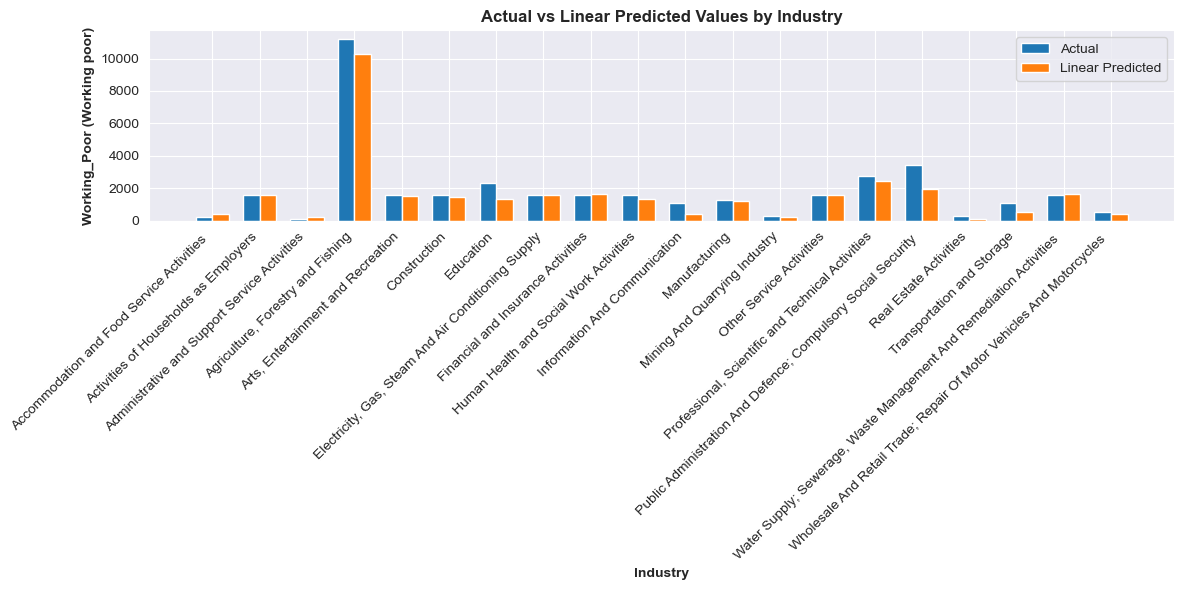

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataframe based on industry names
working_poor_df_sorted = working_poor_df.sort_values(by='Industry')

# Extracting unique industries
industries = working_poor_df_sorted['Industry'].unique()

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Width of each bar
bar_width = 0.35

# Index for the x-axis
index = np.arange(len(industries))

# Plotting actual values
actual_bars = ax.bar(index, working_poor_df_sorted.groupby('Industry')['Actual'].sum(), bar_width, label='Actual')

# Plotting predicted values
predicted_bars = ax.bar(index + bar_width, working_poor_df_sorted.groupby('Industry')['Linear_Predicted'].sum(), bar_width, label='Linear Predicted')

# Adding labels, title, and legend
ax.set_xlabel('Industry', fontweight='bold')
ax.set_ylabel('Working_Poor (Working poor)', fontweight='bold')
ax.set_title('Actual vs Linear Predicted Values by Industry', fontweight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(industries, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

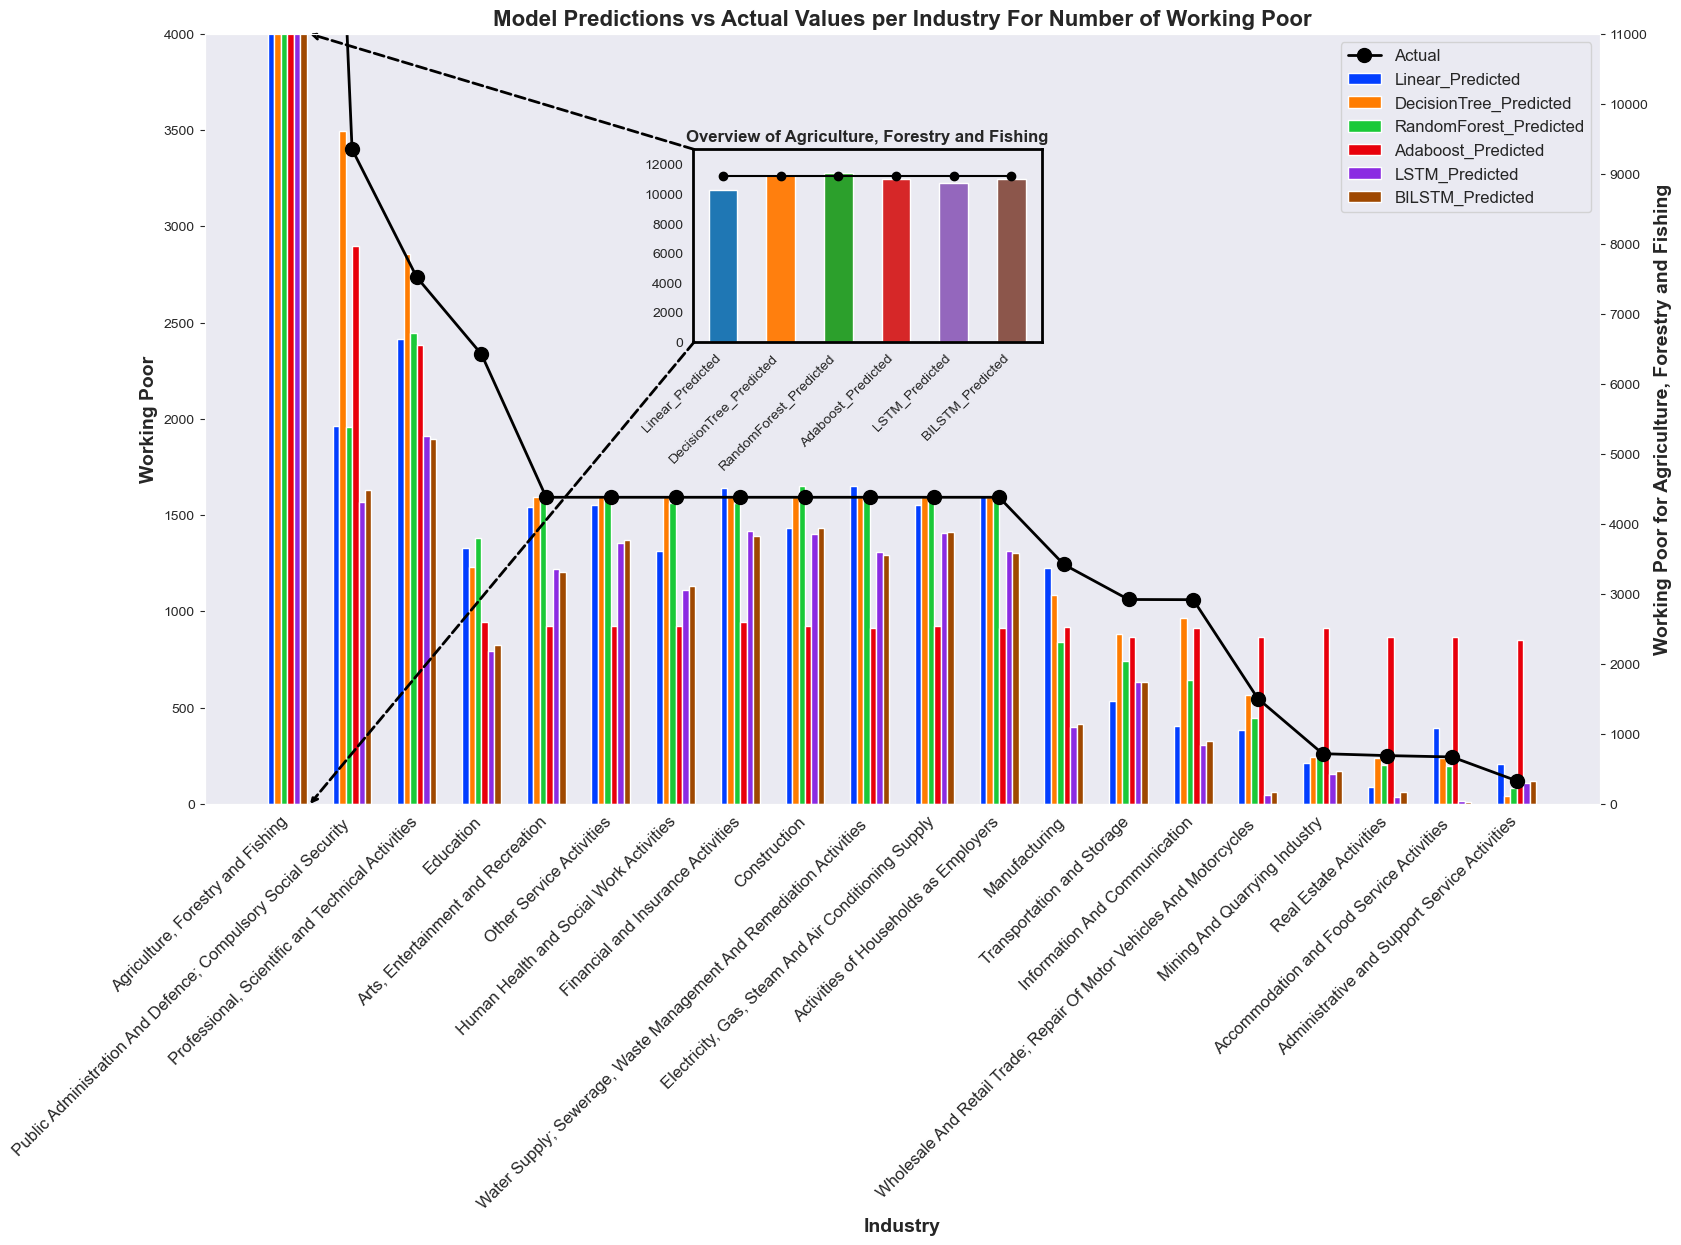

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns


# Old and new model names mapping
name_mapping = {
    'DT_Predicted': 'DecisionTree_Predicted',
    'RF_Predicted': 'RandomForest_Predicted',
    'Bi_LSTM_Predicted': 'BILSTM_Predicted'
}

# Assuming working_poor_df is your DataFrame with the model predictions
# Rename the columns in working_poor_df using the mapping
working_poor_df = working_poor_df.rename(columns=name_mapping)

# Ensure only existing columns are used
models = ['Linear_Predicted', 'DecisionTree_Predicted', 'RandomForest_Predicted', 'Adaboost_Predicted',
          'LSTM_Predicted', 'BILSTM_Predicted']
models = [model for model in models if model in working_poor_df.columns]

# Define a vibrant color palette
colors = sns.color_palette("bright", len(models))

# Bar Chart with Dual Axis and Inset Zoom for Agriculture Industry
fig, ax = plt.subplots(figsize=(18, 10))  # Larger figure size

# Main plot
x = np.arange(len(working_poor_df.index))  # the original indices of the DataFrame
width = 0.1  # the width of the bars

actual = np.array(working_poor_df['Actual'])
predictions = [np.array(working_poor_df[model]) for model in models]

for i, model in enumerate(models):
    ax.bar(x + i * width, predictions[i], width, label=model, color=colors[i])

# Plot the line for actual values with dot markers
ax.plot(x + width * (len(models) - 1) / 2, actual, 'ko-', label='Actual', linewidth=2, markersize=10)

ax.set_xlabel('Industry', fontsize=14, fontweight='bold')
ax.set_ylabel('Working Poor', fontsize=14, fontweight='bold')
ax.set_title('Model Predictions vs Actual Values per Industry For Number of Working Poor', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(models) / 2))
ax.set_xticklabels(working_poor_df['Industry'], rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)

# Remove grid lines
ax.grid(False)

# Set y-axis limits and ticks for the main axis
ax.set_ylim(0, 4000)
ax.set_yticks(np.arange(0, 4500, 500))

# Dual Axis for Agriculture Industry
ax2 = ax.twinx()

# Calculate the scaling factor to align the zero levels
scale_factor = 1

# Set the limits for the second axis to match the scaling
ax2.set_ylim(ax.get_ylim()[0] * scale_factor, ax.get_ylim()[1] * scale_factor)
ax2.set_yticks(np.arange(0 * scale_factor, 12000, 1000 * scale_factor))
ax2.set_ylabel('Working Poor for Agriculture, Forestry and Fishing', fontsize=14, fontweight='bold')

industry_to_zoom = 'Agriculture, Forestry and Fishing'
industry_mask = working_poor_df['Industry'] == industry_to_zoom

if industry_mask.any():
    agriculture_data = working_poor_df.loc[industry_mask]
    agriculture_idx = working_poor_df.index.get_loc(agriculture_data.index[0])

    # Inset plot
    ax_inset = ax.inset_axes([0.350, 0.60, 0.25, 0.25])  # Position: [left, bottom, width, height]

    for i, model in enumerate(models):
        ax_inset.bar(i, agriculture_data[model].values, width=0.5, label=model)

    # Plot actual value with dot marker in the inset
    ax_inset.plot(np.arange(len(models)), [agriculture_data['Actual'].values[0]] * len(models), 'ko-', markersize=6)

    ax_inset.set_ylim(0, 13000)  # Adjust the zoom limit to match the second axis
    ax_inset.set_xticks(np.arange(len(models)))
    ax_inset.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
    ax_inset.set_yticks(np.arange(0, 14000, 2000))
    ax_inset.set_title(f'Overview of {industry_to_zoom}', fontsize=12, fontweight='bold')

    # Remove grid lines and draw a box around the inset plot
    ax_inset.grid(False)
    for spine in ax_inset.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    # Correctly map the connecting lines to the corners
    # Top-left corner connection
    xy_main1 = (agriculture_idx + width * (len(models)), 4000)
    xy_inset1 = (-0.5, 13000)  # Match the top-left corner of the inset plot to 12000

    con1 = ConnectionPatch(xyA=xy_inset1, xyB=xy_main1, coordsA="data", coordsB="data",
                           axesA=ax_inset, axesB=ax, color="black", lw=2, linestyle='--', arrowstyle='->')
    ax_inset.add_artist(con1)

    # Bottom-left corner connection
    xy_main2 = (agriculture_idx + width * (len(models)), 0)
    xy_inset2 = (-0.5, 0)  # Adjust the bottom-left corner to match 0 level

    con2 = ConnectionPatch(xyA=xy_inset2, xyB=xy_main2, coordsA="data", coordsB="data",
                           axesA=ax_inset, axesB=ax, color="black", lw=2, linestyle='--', arrowstyle='->')
    ax_inset.add_artist(con2)

else:
    print(f"No data found for the industry: {industry_to_zoom}")

plt.grid(False)
plt.show()


### b. Predictive Analysis of Total Employment

In [62]:
df = pd.read_csv('/Users/dhruvilborda/Desktop/Data/Dataset/Meanfilled_updated.xlsx', parse_dates=['Year'],
                 index_col=['Year'],)
df.head()

cols = ['TOTAL', 'Contribution_to_GDP',
        'Growth_of_GDP', 'Industry', 'Working_Poor',
        'Wage_bracket_10000_to_14999', 'Wage_bracket_15000_to_19999',
        'Wage_bracket_20000_to_24999', 'Wage_bracket_25000_to_29999',
        'Wage_bracket_30000_to_49999', 'Wage_bracket_50000_to_99999',
        'Wage_bracket_100000_plus']

#Reorder columns
df = df.reindex(columns=cols)


# drop columns I don't want to predict
df.drop(df.columns[4:12], axis=1, inplace=True)
df['TOTAL'] = df['TOTAL'].astype(int)
df = df.reset_index()

# One-hot encode the 'Industry' and 'Year' column
df_encoded = pd.get_dummies(df, columns=['Industry'])
df_encoded = pd.get_dummies(df_encoded, columns=['Year'])

# Selecting features and target variable
X = df_encoded.drop(columns=['TOTAL'])
y = df_encoded['TOTAL']

# Spliting the data into train and test
train_mask = (df_encoded['Year_2018-01-01 00:00:00'] == 0)  # Train on years
test_mask = (df_encoded['Year_2018-01-01 00:00:00'] == 1)


# Train - Test Data
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

In [63]:
# Reshape data for LSTM (assuming 3D input)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Conversion of Numpy array to Tensor
X_train_lstm = X_train_lstm.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test_lstm = X_test_lstm.astype(np.float32)
y_test = y_test.astype(np.float32)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(500, activation='relu', input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# ModelCheckpoint callback, for saving the best model
pathModel = 'best_model.h5'
mc = ModelCheckpoint(pathModel, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Train LSTM model with early stopping
history = lstm_model.fit(X_train_lstm, y_train, epochs=5000, batch_size=32,
                         validation_data=(X_test_lstm, y_test), verbose=0, callbacks=[mc])

# Load the best model
lstm_model.load_weights(pathModel)

# Make predictions with the best LSTM model
lstm_predictions = abs(lstm_model.predict(X_test_lstm).flatten().astype(int))

# Calculate metrics for LSTM
lstm_mape_TE = mean_absolute_error(y_test, lstm_predictions) / y_test.mean() * 100
lstm_rmse_TE = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_r2_TE = r2_score(y_test, lstm_predictions)

2024-10-13 15:17:23.525011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 42678620160.00000, saving model to best_model.h5

Epoch 2: val_loss improved from 42678620160.00000 to 42678460416.00000, saving model to best_model.h5


2024-10-13 15:17:24.018778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/dhruvilborda/miniforge3/envs/Rohil-D/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 42678460416.00000 to 42678243328.00000, saving model to best_model.h5

Epoch 4: val_loss improved from 42678243328.00000 to 42677952512.00000, saving model to best_model.h5

Epoch 5: val_loss improved from 42677952512.00000 to 42677542912.00000, saving model to best_model.h5

Epoch 6: val_loss improved from 42677542912.00000 to 42676994048.00000, saving model to best_model.h5

Epoch 7: val_loss improved from 42676994048.00000 to 42676240384.00000, saving model to best_model.h5

Epoch 8: val_loss improved from 42676240384.00000 to 42675249152.00000, saving model to best_model.h5

Epoch 9: val_loss improved from 42675249152.00000 to 42673979392.00000, saving model to best_model.h5

Epoch 10: val_loss improved from 42673979392.00000 to 42672427008.00000, saving model to best_model.h5

Epoch 11: val_loss improved from 42672427008.00000 to 42670477312.00000, saving model to best_model.h5

Epoch 12: val_loss improved from 42670477312.00000 to 42668154880.0000

2024-10-13 15:25:58.122432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [64]:
# BI-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(500, activation='relu', input_shape=(1, X_train_lstm.shape[2]))))
bilstm_model.add(Dense(1))
bilstm_model.compile(optimizer='adam', loss='mse')

pathBILSTMModel = 'best_bilstm_model.h5'
mc_bilstm = ModelCheckpoint(pathBILSTMModel, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Training BI-LSTM model
history_bilstm = bilstm_model.fit(X_train_lstm, y_train, epochs=5000, batch_size=32,
                                  validation_data=(X_test_lstm, y_test), verbose=0, callbacks=[mc_bilstm])

# Loading the best BI-LSTM model
bilstm_model.load_weights(pathBILSTMModel)

# Predictions with the best BI-LSTM model
bilstm_predictions = abs(bilstm_model.predict(X_test_lstm).flatten().astype(int))

# Calculating metrics for BI-LSTM
bilstm_mape_TE = mean_absolute_error(y_test, bilstm_predictions) / y_test.mean() * 100
bilstm_rmse_TE = np.sqrt(mean_squared_error(y_test, bilstm_predictions))
bilstm_r2_TE = r2_score(y_test, bilstm_predictions)

2024-10-13 15:25:59.193068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 42678501376.00000, saving model to best_bilstm_model.h5


2024-10-13 15:26:00.113684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/dhruvilborda/miniforge3/envs/Rohil-D/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 42678501376.00000 to 42678214656.00000, saving model to best_bilstm_model.h5

Epoch 3: val_loss improved from 42678214656.00000 to 42677817344.00000, saving model to best_bilstm_model.h5

Epoch 4: val_loss improved from 42677817344.00000 to 42677256192.00000, saving model to best_bilstm_model.h5

Epoch 5: val_loss improved from 42677256192.00000 to 42676457472.00000, saving model to best_bilstm_model.h5

Epoch 6: val_loss improved from 42676457472.00000 to 42675339264.00000, saving model to best_bilstm_model.h5

Epoch 7: val_loss improved from 42675339264.00000 to 42673766400.00000, saving model to best_bilstm_model.h5

Epoch 8: val_loss improved from 42673766400.00000 to 42671689728.00000, saving model to best_bilstm_model.h5

Epoch 9: val_loss improved from 42671689728.00000 to 42668965888.00000, saving model to best_bilstm_model.h5

Epoch 10: val_loss improved from 42668965888.00000 to 42665566208.00000, saving model to best_bilstm_model.h5

Epoch 11

2024-10-13 15:38:32.479312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [65]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
# Calculate metrics
linear_mape_TE = mean_absolute_error(y_test, linear_predictions) / y_test.mean() * 100
linear_rmse_TE = np.sqrt(mean_squared_error(y_test, linear_predictions))
linear_r2_TE = r2_score(y_test, linear_predictions)

# Residuals
linear_residuals = y_test - linear_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_linear_TE = sm.stats.stattools.durbin_watson(linear_residuals)

# AIC and BIC cannot be directly calculated from sklearn models, so let's approximate them
n = len(X_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
linear_aic_TE = n * np.log(linear_rmse**2) + 2 * p
linear_bic_TE = n * np.log(linear_rmse**2) + p * np.log(n)

In [66]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Calculate metrics
dt_mape_TE = mean_absolute_error(y_test, dt_predictions) / y_test.mean() * 100
dt_rmse_TE = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2_TE = r2_score(y_test, dt_predictions)

# Residuals
dt_residuals = y_test - dt_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_dt_TE = sm.stats.stattools.durbin_watson(dt_residuals)

# AIC and BIC for Decision Tree (approximation)
dt_aic_TE = n * np.log(dt_rmse**2) + 2 * p
dt_bic_TE = n * np.log(dt_rmse**2) + p * np.log(n)

In [67]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
rf_mape_TE = mean_absolute_error(y_test, rf_predictions) / y_test.mean() * 100
rf_rmse_TE = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2_TE = r2_score(y_test, rf_predictions)

# Residuals
rf_residuals = y_test - rf_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_rf_TE = sm.stats.stattools.durbin_watson(rf_residuals)

# AIC and BIC for Random Forest (approximation)
rf_aic_TE = n * np.log(rf_rmse**2) + 2 * p
rf_bic_TE = n * np.log(rf_rmse**2) + p * np.log(n)

In [68]:
# Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

# Calculate metrics
adaboost_mape_TE = mean_absolute_error(y_test, adaboost_predictions) / y_test.mean() * 100
adaboost_rmse_TE = np.sqrt(mean_squared_error(y_test, adaboost_predictions))
adaboost_r2_TE = r2_score(y_test, adaboost_predictions)

# Residuals
adaboost_residuals = y_test - adaboost_predictions

# Durbin-Watson test for autocorrelation
durbin_watson_adaboost_TE = sm.stats.stattools.durbin_watson(adaboost_residuals)

# AIC and BIC for AdaBoost (approximation)
adaboost_aic_TE = n * np.log(adaboost_rmse**2) + 2 * p
adaboost_bic_TE = n * np.log(adaboost_rmse**2) + p * np.log(n)

In [69]:
# Consolidate metrics for all models
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost'],
    'R²': [ linear_r2_TE, dt_r2_TE, rf_r2_TE, adaboost_r2_TE],
    'MAPE (%)': [linear_mape_TE, dt_mape_TE, rf_mape_TE, adaboost_mape_TE],
    'RMSE': [linear_rmse_TE, dt_rmse_TE, rf_rmse_TE, adaboost_rmse_TE],
    'AIC': [linear_aic_TE, dt_aic_TE, rf_aic_TE, adaboost_aic_TE],
    'BIC': [linear_bic_TE, dt_bic_TE, rf_bic_TE, adaboost_bic_TE],
    'Durbin-Watson': [durbin_watson_linear_TE, durbin_watson_dt_TE, durbin_watson_rf_TE, durbin_watson_adaboost_TE]
}

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame(metrics)
print(comparison_df)

               Model        R²   MAPE (%)          RMSE         AIC  \
0  Linear Regression  0.968460  10.195037  26490.845171  316.267009   
1      Decision Tree  0.991184   5.734949  14005.770450  289.971490   
2      Random Forest  0.995352   4.550356  10169.180601  309.917248   
3           AdaBoost  0.811481  39.237070  64765.438935  325.801214   

          BIC  Durbin-Watson  
0  350.121907       1.513341  
1  323.826387       1.654299  
2  343.772145       1.646501  
3  359.656112       1.803779  


In [70]:
# Example accuracy values for 6 models
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Adaboost', 'LSTM', 'Bi-LSTM']
accuracy_values = [[linear_mape_TE, linear_rmse_TE, linear_r2_TE],
                   [dt_mape_TE, dt_rmse_TE, dt_r2_TE],
                   [rf_mape_TE, rf_rmse_TE, rf_r2_TE],
                   [adaboost_mape_TE, adaboost_rmse_TE, adaboost_r2_TE],
                   [lstm_mape_TE, lstm_rmse_TE, lstm_r2_TE],
                   [bilstm_mape_TE, bilstm_rmse_TE, bilstm_r2_TE]]

# Formatting the accuracy values
formatted_accuracy_values = []
for model in accuracy_values:
    formatted_model = []
    for idx, val in enumerate(model):
        if idx == 0:  # Check if it's the first accuracy value (considered as percentage)
            formatted_model.append(f'{val:.6f}%')
        else:
            formatted_model.append(val)
    formatted_accuracy_values.append(formatted_model)

# Creating a DataFrame
accuracy_df = pd.DataFrame(formatted_accuracy_values, columns=['MAPE', 'RMSE', 'R Square'], index=model_names)

# Displaying the DataFrame
print(accuracy_df)

                         MAPE          RMSE  R Square
Linear Regression  10.195037%  26490.845171  0.968460
Decision Tree       5.734949%  14005.770450  0.991184
Random Forest       4.550356%  10169.180601  0.995352
Adaboost           39.237070%  64765.438935  0.811481
LSTM               22.019024%  45301.417535  0.907766
Bi-LSTM            21.533818%  44328.694563  0.911684


In [71]:
# Convert the predictions to DataFrames
linear_predictions_df = pd.DataFrame({'Linear_Predicted': linear_predictions})
dt_predictions_df = pd.DataFrame({'DT_Predicted': dt_predictions})
rf_predictions_df = pd.DataFrame({'RF_Predicted': rf_predictions})
adaboost_predictions_df = pd.DataFrame({'Adaboost_Predicted': adaboost_predictions})
lstm_predictions_df = pd.DataFrame({'LSTM_Predicted': lstm_predictions})
BI_lstm_predictions_df = pd.DataFrame({'Bi_LSTM_Predicted': bilstm_predictions})

# Concatenate actual and predicted values to X_test
result_df = pd.concat([linear_predictions_df, dt_predictions_df, rf_predictions_df,adaboost_predictions_df,lstm_predictions_df,BI_lstm_predictions_df], axis=1)

# Get the encoded industry columns from X_test
industry_cols = X_test.filter(like='Industry_')

# Get the corresponding industry values for each row
industry_values = industry_cols.idxmax(axis=1).str.split('_').str[-1]

# Create a DataFrame with industry and actual values
industry_actual_df = pd.DataFrame({'Industry': industry_values, 'Actual': y_test})
industry_actual_df = industry_actual_df.reset_index().drop('index',axis=1)

# Concatenate industry_actual_df with result_df
total_emp_df = pd.concat([industry_actual_df, result_df], axis=1)

total_emp_df['%contribution'] = total_emp_df['Actual']/sum(total_emp_df['Actual']) * 100
total_emp_df = total_emp_df.sort_values('%contribution',ascending=False)
total_emp_df

,Industry,Actual,Linear_Predicted,DT_Predicted,RF_Predicted,Adaboost_Predicted,LSTM_Predicted,Bi_LSTM_Predicted,%contribution
14,Education,579118.0,486561.918664,597759.0,579270.76,576663.166667,464640,462713,20.258955
2,Manufacturing,347862.0,310004.015199,303378.0,314733.89,286509.722222,248816,251516,12.169057
0,"Agriculture, Forestry and Fishing",336607.0,337431.947284,336981.0,325666.87,281266.708955,302297,318650,11.775331
16,Public Administration And Defence; Compulsory ...,296510.0,286544.393833,329753.0,289546.91,278213.360825,285713,289604,10.372641
6,Wholesale And Retail Trade; Repair Of Motor Ve...,260427.0,234803.918485,267883.0,251939.64,169333.707965,178730,187937,9.110369
5,Construction,218308.0,169024.301430,221470.0,208582.89,143669.854167,145213,145099,7.636944
15,Human Health and Social Work Activities,148754.0,136362.197039,157970.0,146202.06,121591.736434,133226,118434,5.203776
9,Information And Communication,131177.0,109807.767917,119160.0,112108.70,114257.000000,86940,87231,4.588890
19,Activities of Households as Employers,115837.0,113462.570659,114356.0,115421.73,112534.333333,101963,97995,4.052259
8,Transportation and Storage,90649.0,80497.082498,82552.0,83417.21,143669.854167,75620,78940,3.171122


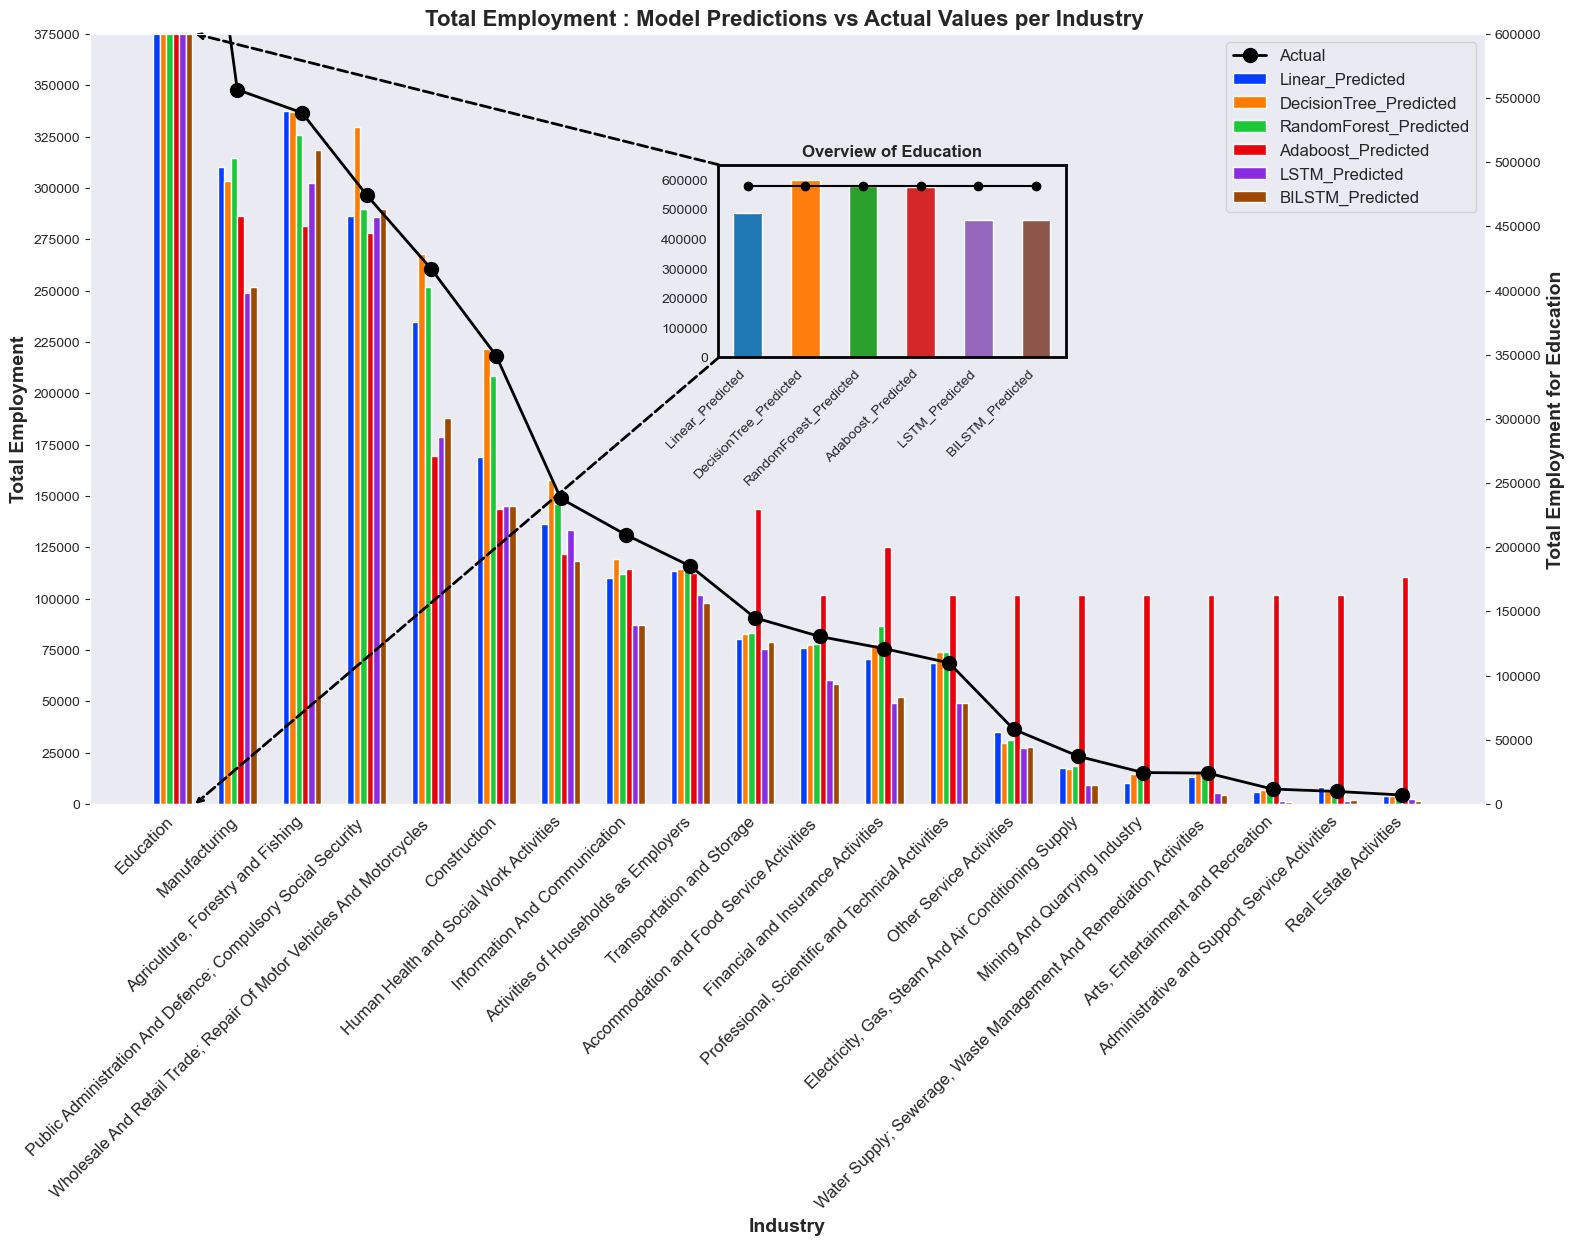

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns



# Old and new model names mapping
name_mapping = {
    'DT_Predicted': 'DecisionTree_Predicted',
    'RF_Predicted': 'RandomForest_Predicted',
    'Bi_LSTM_Predicted': 'BILSTM_Predicted'
}

# Assuming working_poor_df is your DataFrame with the model predictions
# Rename the columns in working_poor_df using the mapping
total_emp_df = total_emp_df.rename(columns=name_mapping)

# Assuming working_poor_df is your DataFrame with the model predictions
# Ensure only existing columns are used
models = ['Linear_Predicted', 'DecisionTree_Predicted', 'RandomForest_Predicted', 'Adaboost_Predicted',
          'LSTM_Predicted', 'BILSTM_Predicted']


# Ensure only existing columns are used
models = [model for model in models if model in total_emp_df.columns]

# Define a vibrant color palette
colors = sns.color_palette("bright", len(models))

# Bar Chart with Dual Axis and Inset Zoom for Education Industry
fig, ax = plt.subplots(figsize=(18, 10))  # Larger figure size

# Main plot
x = np.arange(len(total_emp_df.index))  # the original indices of the DataFrame
width = 0.1  # the width of the bars

actual = np.array(total_emp_df['Actual'])
predictions = [np.array(total_emp_df[model]) for model in models]

for i, model in enumerate(models):
    ax.bar(x + i * width, predictions[i], width, label=model, color=colors[i])

# Plot the line for actual values with dot markers
ax.plot(x + width * (len(models) - 1) / 2, actual, 'ko-', label='Actual', linewidth=2, markersize=10)

ax.set_xlabel('Industry', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Employment', fontsize=14, fontweight='bold')
ax.set_title('Total Employment : Model Predictions vs Actual Values per Industry ', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(models) / 2))
ax.set_xticklabels(total_emp_df['Industry'], rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)

# Remove grid lines
ax.grid(False)

# Set y-axis limits and ticks for the main axis
ax.set_ylim(0, 375000)
ax.set_yticks(np.arange(0, 400000, 25000))

# Dual Axis for Education Industry
ax2 = ax.twinx()

# Calculate the scaling factor to align the zero levels
# scale_factor = 650000 / 375000
scale_factor = 1

# Set the limits for the second axis to match the scaling
ax2.set_ylim(ax.get_ylim()[0] * scale_factor, ax.get_ylim()[1] * scale_factor)
ax2.set_yticks(np.arange(0 * scale_factor, 650000, 50000 * scale_factor))
ax2.set_ylabel('Total Employment for Education', fontsize=14, fontweight='bold')

industry_to_zoom = 'Education'
industry_mask = total_emp_df['Industry'] == industry_to_zoom

if industry_mask.any():
    education_data = total_emp_df.loc[industry_mask]
    education_idx = total_emp_df.index.get_loc(education_data.index[0])

    # Inset plot
    ax_inset = ax.inset_axes([0.450, 0.580, 0.25, 0.25])  # Position: [left, bottom, width, height]

    for i, model in enumerate(models):
        ax_inset.bar(i, education_data[model].values, width=0.5, label=model)

    # Plot actual value with dot marker in the inset
    ax_inset.plot(np.arange(len(models)), [education_data['Actual'].values[0]] * len(models), 'ko-', markersize=6)

    ax_inset.set_ylim(0, 650000)  # Adjust the zoom limit to match the second axis
    ax_inset.set_xticks(np.arange(len(models)))
    ax_inset.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
    ax_inset.set_yticks(np.arange(0 , 650000, 100000 ))
    ax_inset.set_title(f'Overview of {industry_to_zoom}', fontsize=12, fontweight='bold')

    # Remove grid lines and draw a box around the inset plot
    ax_inset.grid(False)
    for spine in ax_inset.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    # Correctly map the connecting lines to the corners
    # Top-left corner connection
    xy_main1 = (education_idx + width * (len(models) ), 375000)
    xy_inset1 = (-0.5, 650000)  # Match the top-left corner of the inset plot to 650000

    con1 = ConnectionPatch(xyA=xy_inset1, xyB=xy_main1, coordsA="data", coordsB="data",
                           axesA=ax_inset, axesB=ax, color="black", lw=2, linestyle='--', arrowstyle='->')
    ax_inset.add_artist(con1)

    # Bottom-left corner connection
    xy_main2 = (education_idx + width * (len(models) ), 0)
    xy_inset2 = (-0.5, 0)  # Adjust the bottom-left corner to match 0 level

    con2 = ConnectionPatch(xyA=xy_inset2, xyB=xy_main2, coordsA="data", coordsB="data",
                           axesA=ax_inset, axesB=ax, color="black", lw=2, linestyle='--', arrowstyle='->')
    ax_inset.add_artist(con2)

else:
    print(f"No data found for the industry: {industry_to_zoom}")
plt.grid(False)
plt.show()
